In [ ]:
#For links list from the first page.


#Import the required libraries or modules.
from selenium import webdriver
from bs4 import BeautifulSoup
import time

#Step 1: Driver ready to scrape the URL.
driver = webdriver.Firefox()
url = 'https://www.cars24.com/buy-used-cars-delhi-ncr/'
driver.get(url)

#Step 2: Set Driver to scroll N number of time.
for i in range(20):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)

page_source = driver.page_source
driver.quit()

soup = BeautifulSoup(page_source, 'html.parser')

#Step 3: Create an empty List to store the Output.
final_list = []

#Step 4: Use BeautifulSoup to scrape the data using tag and class name and append them to the list.
for div in soup.find_all('a', class_='IIJDn'):
    link_tag = div
    if link_tag:
        final_list.append(link_tag['href'])
    else:
        final_list.append(None)

#Step 5: Just print to see the list and the Number of elements inside it.
print(final_list)
print(len(final_list))

['https://www.cars24.com/buy-used-hyundai-verna-2017-cars-noida-10016980766/', 'https://www.cars24.com/buy-used-tata-punch-2022-cars-new-delhi-10007934792/', 'https://www.cars24.com/buy-used-nissan-magnite-2022-cars-faridabad-10181781701/', 'https://www.cars24.com/buy-used-mahindra-xuv700-2021-cars-new-delhi-10090639774/', 'https://www.cars24.com/buy-used-maruti-swift-2023-cars-gurgaon-10158083763/', 'https://www.cars24.com/buy-used-volkswagen-polo-2011-cars-new-delhi-10045838790/', 'https://www.cars24.com/buy-used-hyundai-elite-i20-2014-cars-faridabad-10064136798/', 'https://www.cars24.com/buy-used-maruti-wagon-r-1.0-2018-cars-new-delhi-10136034794/', 'https://www.cars24.com/buy-used-kia-sonet-2022-cars-new-delhi-11240134770/', 'https://www.cars24.com/buy-used-maruti-alto-800-2018-cars-gurgaon-10575931772/', 'https://www.cars24.com/buy-used-hyundai-creta-2022-cars-new-delhi-10027936777/', 'https://www.cars24.com/buy-used-honda-city-2021-cars-new-delhi-10038437794/', 'https://www.cars2

In [ ]:
#For Data reqired in the form a dataframe in Python after scraping the second page.


#Import the required libraries or modules.
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

#Step 1: Driver ready to scrape the URL.
driver = webdriver.Firefox()
url = 'https://www.cars24.com/buy-used-tata-punch-2022-cars-new-delhi-10007934792/'
driver.get(url)
time.sleep(5)

#Step 2: Create a Directionary to store the data.
car_data = {
    "Brand": [],
    "Car Model": [],
    "Car Name": [],
    "Car Varient": [],
    "Car Transmission": [],
    "KM driven": [],
    "Owner Type": [],
    "Fuel Type": [],
    "Registration ID": [],
    "Monthly EMI": [],
    "Car Price": [],
    "Downpayment Amount": [],
    "Location": []
}

#Step 2: Use Selenium to scrape the data from the URL and add those data to the specified key of the dictionary.
lis_texts = [lis.text for lis in driver.find_element(By.CLASS_NAME, "_36EKv").find_elements(By.TAG_NAME, "strong")]
car_data["Car Model"].append(lis_texts[1])
car_data["Registration ID"].append(lis_texts[2])
car_data["Car Transmission"].append(lis_texts[6])
car_data["KM driven"].append(lis_texts[7])
car_data["Owner Type"].append(lis_texts[8])
car_data["Fuel Type"].append(lis_texts[9])

car_price = driver.find_element(By.CLASS_NAME, "_2j-eI").find_element(By.CLASS_NAME, "text-right").find_element(By.CLASS_NAME, "_3i9_p").text
car_data["Car Price"].append(car_price)

location = driver.find_element(By.CLASS_NAME, "_1Rvdw").find_element(By.TAG_NAME, "strong").text
car_data["Location"].append(location)

emi = driver.find_element(By.CLASS_NAME, "_2j-eI").find_element(By.TAG_NAME, "strong").text
car_data["Monthly EMI"].append(emi)

downPayment = driver.find_element(By.CLASS_NAME, "_2j-eI").find_element(By.TAG_NAME, "label").text
car_data["Downpayment Amount"].append(downPayment)

brand_element = driver.find_element(By.CLASS_NAME, "_1bqW4").find_element(By.CLASS_NAME, "_2Ximl").text
brand = brand_element.split()[1]
car_data["Brand"].append(brand)

driver.quit()

#Print to see the dictionary
print(car_data)

{'Brand': ['Tata'], 'Car Model': ['2022'], 'Car Name': [], 'Car Varient': [], 'Car Transmission': ['Manual'], 'KM driven': ['21,955 km'], 'Owner Type': ['1st owner'], 'Fuel Type': ['Petrol'], 'Registration ID': ['DL11-CC9237'], 'Monthly EMI': ['₹13,646/month'], 'Car Price': ['₹6.98 Lakh'], 'Downpayment Amount': ['On Zero down payment'], 'Location': ['Metro Walk, Rohini, New Delhi']}


In [ ]:
#Combination of above codes using for loop with try and except to handle the errors.

#Import the required libraries or modules.
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import time
import pandas as pd
import numpy as np  # For NaN values

# Step 1: Initialize the webdriver and get the initial page
driver = webdriver.Firefox()
url = 'https://www.cars24.com/buy-used-cars-delhi-ncr/'
driver.get(url)

# Step 2: Scroll to load more cars
for i in range(25):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(1)

page_source = driver.page_source
soup = BeautifulSoup(page_source, 'html.parser')

# Step 3: Extract car links
final_list = []
for div in soup.find_all('a', class_='IIJDn'):
    link_tag = div
    if link_tag:
        final_list.append(link_tag['href'])

# Step 4: Initialize the dictionary to store data
car_data = {
    "Brand": [],
    "Car Model": [],
    "Car Name": [],
    "Car Variant": [],
    "Car Transmission": [],
    "KM driven": [],
    "Owner Type": [],
    "Fuel Type": [],
    "Registration ID": [],
    "Monthly EMI": [],
    "Car Price": [],
    "Downpayment Amount": [],
    "Location": []
}

# Step 5: Loop through each link and extract data
for link in final_list:
    driver.get(link)
    time.sleep(2)  # Wait for the page to load

    try:
        lis_texts = [lis.text for lis in driver.find_element(By.CLASS_NAME, "_36EKv").find_elements(By.TAG_NAME, "strong")]

        try:
            car_data["Car Model"].append(lis_texts[1])
        except IndexError:
            car_data["Car Model"].append(np.nan)

        try:
            car_data["Registration ID"].append(lis_texts[2])
        except IndexError:
            car_data["Registration ID"].append(np.nan)

        try:
            car_data["Car Transmission"].append(lis_texts[6])
        except IndexError:
            car_data["Car Transmission"].append(np.nan)

        try:
            car_data["KM driven"].append(lis_texts[7])
        except IndexError:
            car_data["KM driven"].append(np.nan)

        try:
            car_data["Owner Type"].append(lis_texts[8])
        except IndexError:
            car_data["Owner Type"].append(np.nan)

        try:
            car_data["Fuel Type"].append(lis_texts[9])
        except IndexError:
            car_data["Fuel Type"].append(np.nan)

        try:
            car_price = driver.find_element(By.CLASS_NAME, "_2j-eI").find_element(By.CLASS_NAME,"text-right").find_element(By.CLASS_NAME, "_3i9_p").text
            car_data["Car Price"].append(car_price)
        except Exception as e:
            print(f"Error getting Car Price for link: {link}, Error: {str(e)}")
            car_data["Car Price"].append(np.nan)

        try:
            location = driver.find_element(By.CLASS_NAME, "_1Rvdw").find_element(By.TAG_NAME, "strong").text
            car_data["Location"].append(location)
        except Exception as e:
            print(f"Error getting Location for link: {link}, Error: {str(e)}")
            car_data["Location"].append(np.nan)

        try:
            emi = driver.find_element(By.CLASS_NAME, "_2j-eI").find_element(By.TAG_NAME, "strong").text
            car_data["Monthly EMI"].append(emi)
        except Exception as e:
            print(f"Error getting Monthly EMI for link: {link}, Error: {str(e)}")
            car_data["Monthly EMI"].append(np.nan)

        try:
            downPayment = driver.find_element(By.CLASS_NAME, "_2j-eI").find_element(By.TAG_NAME, "label").text
            car_data["Downpayment Amount"].append(downPayment)
        except Exception as e:
            print(f"Error getting Downpayment Amount for link: {link}, Error: {str(e)}")
            car_data["Downpayment Amount"].append(np.nan)

        try:
            brand_element = driver.find_element(By.CLASS_NAME, "_1bqW4").find_element(By.CLASS_NAME, "_2Ximl").text
            brand = brand_element.split()[1]
            car_data["Brand"].append(brand)
        except Exception as e:
            print(f"Error getting Brand for link: {link}, Error: {str(e)}")
            car_data["Brand"].append(np.nan)

        try:
            car_name_variant = driver.find_element(By.CLASS_NAME, "_1bqW4").find_element(By.CLASS_NAME,
                                                                                         "_2Ximl").text.split()
            car_name = ' '.join(car_name_variant[2:])  # Join first two elements for Car Name
            car_variant = ' '.join(car_name_variant[2:])  # Join remaining elements for Car Variant
            car_data["Car Name"].append(car_name)
            car_data["Car Variant"].append(car_variant)
        except Exception as e:
            print(f"Error getting Car Name and Car Variant for link: {link}, Error: {str(e)}")
            car_data["Car Name"].append(np.nan)
            car_data["Car Variant"].append(np.nan)

    except Exception as e:
        print(f"Error occurred for link: {link}, Error: {str(e)}")

# Close the driver
driver.quit()

# Step 6: Convert dictionary to DataFrame
df = pd.DataFrame(car_data)

# Print or save the DataFrame
print(df)
# You can also save the DataFrame to a CSV file
df.to_csv('cars24_delhi_ncr_data.csv', index=False)

        Brand Car Model                          Car Name  \
0     Hyundai      2017                 Verna 1.6 VTVT SX   
1        Tata      2022             PUNCH ACCOMPLISHED MT   
2      Nissan      2022                        MAGNITE XE   
3    Mahindra      2021            XUV700 AX 5 P MT 7 STR   
4      Maruti      2023                     Swift VXI AMT   
..        ...       ...                               ...   
755    Maruti      2017           Baleno ALPHA PETROL 1.2   
756    Maruti      2019        Baleno ZETA CVT PETROL 1.2   
757    Maruti      2017             Ciaz ALPHA 1.4 PETROL   
758   Hyundai      2015  Grand i10 ASTA AT 1.2 KAPPA VTVT   
759     Honda      2017               Amaze 1.2L I-VTEC S   

                          Car Variant Car Transmission  KM driven Owner Type  \
0                   Verna 1.6 VTVT SX           Manual  18,099 km  1st owner   
1               PUNCH ACCOMPLISHED MT           Manual  21,955 km  1st owner   
2                          

In [ ]:
#To check the null Values in the created df.

import pandas as pd

df=pd.read_csv('cars24_delhi_ncr_data.csv')

df.isnull().sum()

df.isnull().sum()/df.shape[0]*100


Brand                  0.000000
Car Model              0.000000
Car Name               0.000000
Car Variant            0.000000
Car Transmission       0.000000
KM driven              0.000000
Owner Type             0.000000
Fuel Type             11.052632
Registration ID        0.000000
Monthly EMI            0.000000
Car Price              0.000000
Downpayment Amount     0.000000
Location               0.000000
dtype: float64

In [ ]:
#To see

df[df.isnull().any(axis=1)].head(20)

,Brand,Car Model,Car Name,Car Variant,Car Transmission,KM driven,Owner Type,Fuel Type,Registration ID,Monthly EMI,Car Price,Downpayment Amount,Location
13,Maruti,2018,Wagon R 1.0 VXI AMT,Wagon R 1.0 VXI AMT,"27,391 km",1st owner,Petrol,NaN,DL8C-AU8609,"₹8,504/month",₹4.35 Lakh,On Zero down payment,"Metro Walk, Rohini, New Delhi"
15,Maruti,2019,Alto K10 VXI,Alto K10 VXI,"16,452 km",1st owner,Petrol,NaN,UP70-EX1272,"₹7,222/month",₹3.69 Lakh,On Zero down payment,"Sector-18, Noida"
35,Hyundai,2013,i20 SPORTZ 1.2,i20 SPORTZ 1.2,"50,975 km",1st owner,Petrol,NaN,DL7C-P5395,"₹8,137/month",₹3.09 Lakh,On Zero down payment,"Chhatarpur, Delhi"
58,Maruti,2017,IGNIS ALPHA 1.2,IGNIS ALPHA 1.2,"52,939 km",2nd owner,Petrol,NaN,DL12-CL1248,"₹8,250/month",₹4.22 Lakh,On Zero down payment,"Sector-18, Noida"
62,Tata,2017,Tiago XTA PETROL,Tiago XTA PETROL,"102,235 km",1st owner,Petrol,NaN,UP16-BU2809,"₹9,231/month",₹4.15 Lakh,On Zero down payment,"GIP Mall, Noida"
64,Hyundai,2020,Grand i10 SPORTZ 1.2 KAPPA VTVT,Grand i10 SPORTZ 1.2 KAPPA VTVT,"56,055 km",1st owner,Petrol,NaN,DL4C-AZ6075,"₹10,772/month",₹5.51 Lakh,On Zero down payment,"GIP Mall, Noida"
69,Hyundai,2019,Grand i10 SPORTZ 1.2 KAPPA VTVT,Grand i10 SPORTZ 1.2 KAPPA VTVT,"33,693 km",1st owner,Petrol,NaN,UP14-EB0540,"₹10,342/month",₹5.29 Lakh,On Zero down payment,"Sector-18, Noida"
94,Maruti,2019,Baleno ALPHA PETROL 1.2,Baleno ALPHA PETROL 1.2,"48,887 km",1st owner,Petrol,NaN,DL5C-R0884,"₹13,060/month",₹6.68 Lakh,On Zero down payment,"GIP Mall, Noida"
96,Ford,2017,Ecosport AMBIENTE 1.5L PETROL,Ecosport AMBIENTE 1.5L PETROL,"86,358 km",1st owner,Petrol,NaN,DL10-CJ0531,"₹9,521/month",₹4.87 Lakh,On Zero down payment,"Metro Walk, Rohini, New Delhi"
97,Hyundai,2017,Elite i20 MAGNA EXECUTIVE 1.2,Elite i20 MAGNA EXECUTIVE 1.2,"59,105 km",1st owner,CNG,NaN,DL8C-AS3680,"₹9,580/month",₹4.9 Lakh,On Zero down payment,"Chhatarpur, Delhi"


In [ ]:
#Main code which is a combination of everything, and will return csv files for each city entered.
#Also have handle the Car Transmission error coming above with logic.

#Import the required libraries or modules.
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import time
import pandas as pd
import numpy as np  # For NaN values

# Initialize the webdriver
driver = webdriver.Firefox()

# List of cities to scrape data from
Cities = ['delhi-ncr', 'mumbai']

for city in Cities:
    url = f'https://www.cars24.com/buy-used-cars-{city}/'
    driver.get(url)

    # Scroll to load more cars
    for i in range(25):
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(1)

    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'html.parser')

    # Extract car links
    final_list = []
    for div in soup.find_all('a', class_='IIJDn'):
        link_tag = div
        if link_tag:
            final_list.append(link_tag['href'])

    # Initialize the dictionary to store data
    car_data = {
        "Brand": [],
        "Car Model": [],
        "Car Name": [],
        "Car Variant": [],
        "Car Transmission": [],
        "KM driven": [],
        "Owner Type": [],
        "Fuel Type": [],
        "Registration ID": [],
        "Monthly EMI": [],
        "Car Price": [],
        "Downpayment Amount": [],
        "Location": []
    }

    # Loop through each link and extract data
    for link in final_list:
        driver.get(link)
        time.sleep(2)  # Wait for the page to load

        try:
            lis_elements = driver.find_element(By.CLASS_NAME, "_36EKv").find_elements(By.TAG_NAME, "strong")
            lis_texts = [lis.text for lis in lis_elements]

            # Insert 'Manual' if lis_texts has exactly 9 elements
            if len(lis_texts) == 9:
                lis_texts.insert(6, 'Manual')

            try:
                car_data["Car Model"].append(lis_texts[1])
            except IndexError:
                car_data["Car Model"].append(np.nan)

            try:
                car_data["Registration ID"].append(lis_texts[2])
            except IndexError:
                car_data["Registration ID"].append(np.nan)

            try:
                car_data["Car Transmission"].append(lis_texts[6])
            except IndexError:
                car_data["Car Transmission"].append(np.nan)

            try:
                car_data["KM driven"].append(lis_texts[7])
            except IndexError:
                car_data["KM driven"].append(np.nan)

            try:
                car_data["Owner Type"].append(lis_texts[8])
            except IndexError:
                car_data["Owner Type"].append(np.nan)

            try:
                car_data["Fuel Type"].append(lis_texts[9])
            except IndexError:
                car_data["Fuel Type"].append(np.nan)

            try:
                car_price = driver.find_element(By.CLASS_NAME, "_2j-eI").find_element(By.CLASS_NAME, "text-right").find_element(By.CLASS_NAME, "_3i9_p").text
                car_data["Car Price"].append(car_price)
            except Exception as e:
                print(f"Error getting Car Price for link: {link}, Error: {str(e)}")
                car_data["Car Price"].append(np.nan)

            try:
                location = driver.find_element(By.CLASS_NAME, "_1Rvdw").find_element(By.TAG_NAME, "strong").text
                car_data["Location"].append(location)
            except Exception as e:
                print(f"Error getting Location for link: {link}, Error: {str(e)}")
                car_data["Location"].append(np.nan)

            try:
                emi = driver.find_element(By.CLASS_NAME, "_2j-eI").find_element(By.TAG_NAME, "strong").text
                car_data["Monthly EMI"].append(emi)
            except Exception as e:
                print(f"Error getting Monthly EMI for link: {link}, Error: {str(e)}")
                car_data["Monthly EMI"].append(np.nan)

            try:
                downPayment = driver.find_element(By.CLASS_NAME, "_2j-eI").find_element(By.TAG_NAME, "label").text
                car_data["Downpayment Amount"].append(downPayment)
            except Exception as e:
                print(f"Error getting Downpayment Amount for link: {link}, Error: {str(e)}")
                car_data["Downpayment Amount"].append(np.nan)

            try:
                brand_element = driver.find_element(By.CLASS_NAME, "_1bqW4").find_element(By.CLASS_NAME, "_2Ximl").text
                brand = brand_element.split()[1]
                car_data["Brand"].append(brand)
            except Exception as e:
                print(f"Error getting Brand for link: {link}, Error: {str(e)}")
                car_data["Brand"].append(np.nan)

            try:
                car_name_variant = driver.find_element(By.CLASS_NAME, "_1bqW4").find_element(By.CLASS_NAME, "_2Ximl").text.split()
                car_name = ' '.join(car_name_variant[2:])  # Join first two elements for Car Name
                car_variant = ' '.join(car_name_variant[2:])  # Join remaining elements for Car Variant
                car_data["Car Name"].append(car_name)
                car_data["Car Variant"].append(car_variant)
            except Exception as e:
                print(f"Error getting Car Name and Car Variant for link: {link}, Error: {str(e)}")
                car_data["Car Name"].append(np.nan)
                car_data["Car Variant"].append(np.nan)

        except Exception as e:
            print(f"Error occurred for link: {link}, Error: {str(e)}")

    # Convert dictionary to DataFrame
    df = pd.DataFrame(car_data)

    # Print or save the DataFrame
    print(df)
    # Save the DataFrame to a CSV file
    df.to_csv(f'cars24_{city}.csv', index=False)

# Close the driver
driver.quit()

Error occurred for link: https://www.cars24.com/buy-used-honda-city-2021-cars-new-delhi-10038437794/, Error: Message: Unable to locate element: ._36EKv; For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
RemoteError@chrome://remote/content/shared/RemoteError.sys.mjs:8:8
WebDriverError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:193:5
NoSuchElementError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:511:5
dom.find/</<@chrome://remote/content/shared/DOM.sys.mjs:136:16

        Brand Car Model                            Car Name  \
0     Hyundai      2017                   Verna 1.6 VTVT SX   
1        Tata      2022               PUNCH ACCOMPLISHED MT   
2      Nissan      2022                          MAGNITE XE   
3    Mahindra      2021              XUV700 AX 5 P MT 7 STR   
4      Maruti      2023                       Swift VXI AMT   
..        ...       ...

In [ ]:
#Data Cleaning

import pandas as pd

df = pd.read_csv('cars24_delhi-ncr.csv')

# Display the first few rows of the DataFrame
df.head(10)

,Brand,Car Model,Car Name,Car Variant,Car Transmission,KM driven,Owner Type,Fuel Type,Registration ID,Monthly EMI,Car Price,Downpayment Amount,Location
0,Hyundai,2017,Verna 1.6 VTVT SX,Verna 1.6 VTVT SX,Manual,"18,099 km",1st owner,Petrol,DL10-CK2335,"₹15,562/month",₹7.96 Lakh,On Zero down payment,"GIP Mall, Noida"
1,Tata,2022,PUNCH ACCOMPLISHED MT,PUNCH ACCOMPLISHED MT,Manual,"21,955 km",1st owner,Petrol,DL11-CC9237,"₹13,646/month",₹6.98 Lakh,On Zero down payment,"Metro Walk, Rohini, New Delhi"
2,Nissan,2022,MAGNITE XE,MAGNITE XE,Manual,"19,269 km",1st owner,Petrol,HR16-Z7809,"₹11,711/month",₹5.99 Lakh,On Zero down payment,"Parsvnath City Mall, Faridabad"
3,Mahindra,2021,XUV700 AX 5 P MT 7 STR,XUV700 AX 5 P MT 7 STR,Manual,"36,981 km",1st owner,Petrol,DL8C-BC9119,"₹27,752/month",₹14.58 Lakh,On Zero down payment,"Chhatarpur, Delhi"
4,Maruti,2023,Swift VXI AMT,Swift VXI AMT,Automatic,"11,603 km",1st owner,Petrol,HR26-FD3340,"₹13,763/month",₹7.04 Lakh,On Zero down payment,"M3M Urbana, Golf Course Ext., ..."
5,Volkswagen,2011,Polo COMFORTLINE 1.2L PETROL,Polo COMFORTLINE 1.2L PETROL,Manual,"80,811 km",1st owner,Petrol,HR06-Y5677,"₹9,085/month",₹1.93 Lakh,On Zero down payment,"Metro Walk, Rohini, New Delhi"
6,Hyundai,2014,Elite i20 ASTA 1.2,Elite i20 ASTA 1.2,Manual,"68,876 km",1st owner,Petrol,DL4C-BA3256,"₹9,343/month",₹4.2 Lakh,On Zero down payment,"Parsvnath City Mall, Faridabad"
7,Maruti,2018,Wagon R 1.0 LXI CNG,Wagon R 1.0 LXI CNG,Manual,"56,257 km",1st owner,CNG,HR26-DS8532,"₹7,840/month",₹4.01 Lakh,On Zero down payment,"Metro Walk, Rohini, New Delhi"
8,KIA,2022,SONET HTX 1.0 IMT,SONET HTX 1.0 IMT,Manual,"20,224 km",2nd owner,Petrol,DL14-CG4453,"₹19,053/month",₹10.01 Lakh,On Zero down payment,"Metro Walk, Rohini, New Delhi"
9,Maruti,2018,Alto 800 LXI,Alto 800 LXI,Manual,"67,026 km",2nd owner,Petrol,HR50-G1397,"₹5,474/month",₹2.8 Lakh,On Zero down payment,"M3M Urbana, Golf Course Ext., ..."


In [ ]:
df.tail(10)

,Brand,Car Model,Car Name,Car Variant,Car Transmission,KM driven,Owner Type,Fuel Type,Registration ID,Monthly EMI,Car Price,Downpayment Amount,Location
809,Maruti,2011,Ritz ZXI,Ritz ZXI,Manual,"98,511 km",2nd owner,Petrol,HR51-AN5961,"₹8,850/month",₹1.88 Lakh,On Zero down payment,"Metro Walk, Rohini, New Delhi"
810,Honda,2014,City 1.5L I-VTEC V MT,City 1.5L I-VTEC V MT,Manual,"81,451 km",1st owner,Petrol,HR72-B6877,"₹10,737/month",₹4.83 Lakh,On Zero down payment,"Metro Walk, Rohini, New Delhi"
811,Maruti,2011,Alto K10 VXI,Alto K10 VXI,Manual,"83,452 km",1st owner,Petrol,UP14-BF6550,"₹7,720/month",₹1.64 Lakh,On Zero down payment,"KW Delhi 6, Raj Nagar Extensio..."
812,Hyundai,2019,VENUE SX PLUS 1.0 TURBO DCT,VENUE SX PLUS 1.0 TURBO DCT,Automatic,"70,908 km",1st owner,Petrol,DL8C-AY4539,"₹17,683/month",₹9.29 Lakh,On Zero down payment,"Chhatarpur, Delhi"
813,Maruti,2014,Ertiga VXI,Ertiga VXI,Manual,"61,950 km",1st owner,Petrol,HR26-CH7911,"₹11,055/month",₹4.97 Lakh,On Zero down payment,"Metro Walk, Rohini, New Delhi"
814,Tata,2020,NEXON XZ PLUS (O) PETROL DUAL TONE,NEXON XZ PLUS (O) PETROL DUAL TONE,Manual,"43,032 km",1st owner,Petrol,HR03-AA4930,"₹16,027/month",₹8.42 Lakh,On Zero down payment,"Spaze Platinum, Sohna Road, Gu..."
815,Maruti,2018,Baleno DELTA CVT PETROL 1.2,Baleno DELTA CVT PETROL 1.2,Automatic,"70,189 km",1st owner,Petrol,DL6C-R5785,"₹10,929/month",₹5.59 Lakh,On Zero down payment,"Metro Walk, Rohini, New Delhi"
816,Maruti,2019,Baleno ALPHA CVT PETROL 1.2,Baleno ALPHA CVT PETROL 1.2,Automatic,"30,586 km",2nd owner,Petrol,HR26-EE0236,"₹13,822/month",₹7.07 Lakh,On Zero down payment,"M3M Urbana, Golf Course Ext., ..."
817,Honda,2013,Brio VX MT,Brio VX MT,Manual,"56,989 km",1st owner,Petrol,DL9C-U5621,"₹7,847/month",₹2.98 Lakh,On Zero down payment,"Sector-18, Noida"
818,Honda,2013,Brio VX MT,Brio VX MT,Manual,"25,516 km",1st owner,Petrol,HR26-CB1215,"₹8,980/month",₹3.41 Lakh,On Zero down payment,"M3M Urbana, Golf Course Ext., ..."


In [ ]:
import pandas as pd

df=pd.read_csv('cars24_delhi-ncr.csv')

df.loc[58]
print(df.loc[58])

Brand                               Maruti
Car Model                             2021
Car Name                IGNIS ZETA 1.2 AMT
Car Variant             IGNIS ZETA 1.2 AMT
Car Transmission                 Automatic
KM driven                        13,494 km
Owner Type                       1st owner
Fuel Type                           Petrol
Registration ID                UP16-CY4024
Monthly EMI                  ₹12,803/month
Car Price                       ₹6.55 Lakh
Downpayment Amount    On Zero down payment
Location                   GIP Mall, Noida
Name: 58, dtype: object


In [ ]:
df[df.isnull().any(axis=1)]

,Brand,Car Model,Car Name,Car Variant,Car Transmission,KM driven,Owner Type,Fuel Type,Registration ID,Monthly EMI,Car Price,Downpayment Amount,Location


In [ ]:
df.describe()

,Car Model
count,819.000000
mean,2018.180708
std,3.086617
min,2010.000000
25%,2016.000000
50%,2019.000000
75%,2021.000000
max,2023.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Brand               819 non-null    object
 1   Car Model           819 non-null    int64 
 2   Car Name            819 non-null    object
 3   Car Variant         819 non-null    object
 4   Car Transmission    819 non-null    object
 5   KM driven           819 non-null    object
 6   Owner Type          819 non-null    object
 7   Fuel Type           819 non-null    object
 8   Registration ID     819 non-null    object
 9   Monthly EMI         819 non-null    object
 10  Car Price           819 non-null    object
 11  Downpayment Amount  819 non-null    object
 12  Location            819 non-null    object
dtypes: int64(1), object(12)
memory usage: 83.3+ KB


In [ ]:
df.isnull().sum()

Brand                 0
Car Model             0
Car Name              0
Car Variant           0
Car Transmission      0
KM driven             0
Owner Type            0
Fuel Type             0
Registration ID       0
Monthly EMI           0
Car Price             0
Downpayment Amount    0
Location              0
dtype: int64

In [ ]:
# # Define a function to clean and convert the "KM Driven" column

df['KM driven']=df['KM driven'].replace(' km','').replace(',','').astype(int)

In [ ]:
df.dtypes

Brand                 object
Car Model              int64
Car Name              object
Car Variant           object
Car Transmission      object
KM driven              int32
Owner Type            object
Fuel Type             object
Registration ID       object
Monthly EMI           object
Car Price             object
Downpayment Amount    object
Location              object
dtype: object

In [ ]:
def convert_emi_to_int(emi_str):
    emi_str = emi_str.replace('₹', '').replace(',', '').replace('/month', '')
    return int(emi_str.strip())

# Apply the function to the "Monthly EMI" column
df['Monthly EMI'] = df['Monthly EMI'].apply(convert_emi_to_int)

In [ ]:
df.dtypes

Brand                 object
Car Model              int64
Car Name              object
Car Variant           object
Car Transmission      object
KM driven             object
Owner Type            object
Fuel Type             object
Registration ID       object
Monthly EMI           object
Car Price             object
Downpayment Amount    object
Location              object
dtype: object

In [ ]:
def convert_price_to_int(price_str):
    if pd.isnull(price_str):  # Handle missing values
        return 0
    price_str = price_str.replace('₹', '').replace(' Lakh', '')
    return float(price_str)
# Apply the function to the "Car Price" column
df['Car Price'] = df['Car Price'].apply(convert_price_to_int)

df.dtypes

Brand                  object
Car Model               int64
Car Name               object
Car Variant            object
Car Transmission       object
KM driven              object
Owner Type             object
Fuel Type              object
Registration ID        object
Monthly EMI            object
Car Price             float64
Downpayment Amount     object
Location               object
dtype: object

In [ ]:
df=df.rename(columns={'Car Price':'Car Price(in lakhs)'})

df.head(5)

,Brand,Car Model,Car Name,Car Variant,Car Transmission,KM driven,Owner Type,Fuel Type,Registration ID,Monthly EMI,Car Price(in lakhs),Downpayment Amount,Location
0,Hyundai,2017,Verna 1.6 VTVT SX,Verna 1.6 VTVT SX,Manual,"18,099 km",1st owner,Petrol,DL10-CK2335,"₹15,562/month",7.96,On Zero down payment,"GIP Mall, Noida"
1,Tata,2022,PUNCH ACCOMPLISHED MT,PUNCH ACCOMPLISHED MT,Manual,"21,955 km",1st owner,Petrol,DL11-CC9237,"₹13,646/month",6.98,On Zero down payment,"Metro Walk, Rohini, New Delhi"
2,Nissan,2022,MAGNITE XE,MAGNITE XE,Manual,"19,269 km",1st owner,Petrol,HR16-Z7809,"₹11,711/month",5.99,On Zero down payment,"Parsvnath City Mall, Faridabad"
3,Mahindra,2021,XUV700 AX 5 P MT 7 STR,XUV700 AX 5 P MT 7 STR,Manual,"36,981 km",1st owner,Petrol,DL8C-BC9119,"₹27,752/month",14.58,On Zero down payment,"Chhatarpur, Delhi"
4,Maruti,2023,Swift VXI AMT,Swift VXI AMT,Automatic,"11,603 km",1st owner,Petrol,HR26-FD3340,"₹13,763/month",7.04,On Zero down payment,"M3M Urbana, Golf Course Ext., ..."


In [ ]:
ct=df['Downpayment Amount'].unique
print(ct)

<bound method Series.unique of 0      On Zero down payment
1      On Zero down payment
2      On Zero down payment
3      On Zero down payment
4      On Zero down payment
               ...         
814    On Zero down payment
815    On Zero down payment
816    On Zero down payment
817    On Zero down payment
818    On Zero down payment
Name: Downpayment Amount, Length: 819, dtype: object>


In [ ]:
df['Downpayment Amount']=0.0
df.head(5)
df.dtypes

Brand                   object
Car Model                int64
Car Name                object
Car Variant             object
Car Transmission        object
KM driven               object
Owner Type              object
Fuel Type               object
Registration ID         object
Monthly EMI             object
Car Price(in lakhs)    float64
Downpayment Amount     float64
Location                object
dtype: object

In [ ]:
df['Owner Type'] = df['Owner Type'].str.replace(' owner', '', regex=False)
df.head(5)

,Brand,Car Model,Car Name,Car Variant,Car Transmission,KM driven,Owner Type,Fuel Type,Registration ID,Monthly EMI,Car Price(in lakhs),Downpayment Amount,Location
0,Hyundai,2017,Verna 1.6 VTVT SX,Verna 1.6 VTVT SX,Manual,"18,099 km",1st,Petrol,DL10-CK2335,"₹15,562/month",7.96,0.0,"GIP Mall, Noida"
1,Tata,2022,PUNCH ACCOMPLISHED MT,PUNCH ACCOMPLISHED MT,Manual,"21,955 km",1st,Petrol,DL11-CC9237,"₹13,646/month",6.98,0.0,"Metro Walk, Rohini, New Delhi"
2,Nissan,2022,MAGNITE XE,MAGNITE XE,Manual,"19,269 km",1st,Petrol,HR16-Z7809,"₹11,711/month",5.99,0.0,"Parsvnath City Mall, Faridabad"
3,Mahindra,2021,XUV700 AX 5 P MT 7 STR,XUV700 AX 5 P MT 7 STR,Manual,"36,981 km",1st,Petrol,DL8C-BC9119,"₹27,752/month",14.58,0.0,"Chhatarpur, Delhi"
4,Maruti,2023,Swift VXI AMT,Swift VXI AMT,Automatic,"11,603 km",1st,Petrol,HR26-FD3340,"₹13,763/month",7.04,0.0,"M3M Urbana, Golf Course Ext., ..."


In [ ]:
df=df.drop(columns=['Car Variant'])
df.head(5)

,Brand,Car Model,Car Name,Car Transmission,KM driven,Owner Type,Fuel Type,Registration ID,Monthly EMI,Car Price(in lakhs),Downpayment Amount,Location
0,Hyundai,2017,Verna 1.6 VTVT SX,Manual,"18,099 km",1st,Petrol,DL10-CK2335,"₹15,562/month",7.96,0.0,"GIP Mall, Noida"
1,Tata,2022,PUNCH ACCOMPLISHED MT,Manual,"21,955 km",1st,Petrol,DL11-CC9237,"₹13,646/month",6.98,0.0,"Metro Walk, Rohini, New Delhi"
2,Nissan,2022,MAGNITE XE,Manual,"19,269 km",1st,Petrol,HR16-Z7809,"₹11,711/month",5.99,0.0,"Parsvnath City Mall, Faridabad"
3,Mahindra,2021,XUV700 AX 5 P MT 7 STR,Manual,"36,981 km",1st,Petrol,DL8C-BC9119,"₹27,752/month",14.58,0.0,"Chhatarpur, Delhi"
4,Maruti,2023,Swift VXI AMT,Automatic,"11,603 km",1st,Petrol,HR26-FD3340,"₹13,763/month",7.04,0.0,"M3M Urbana, Golf Course Ext., ..."


In [ ]:
df['City']='Delhi'
df.head(5)

,Brand,Car Model,Car Name,Car Transmission,KM driven,Owner Type,Fuel Type,Registration ID,Monthly EMI,Car Price(in lakhs),Downpayment Amount,Location,City
0,Hyundai,2017,Verna 1.6 VTVT SX,Manual,"18,099 km",1st,Petrol,DL10-CK2335,"₹15,562/month",7.96,0.0,"GIP Mall, Noida",Delhi
1,Tata,2022,PUNCH ACCOMPLISHED MT,Manual,"21,955 km",1st,Petrol,DL11-CC9237,"₹13,646/month",6.98,0.0,"Metro Walk, Rohini, New Delhi",Delhi
2,Nissan,2022,MAGNITE XE,Manual,"19,269 km",1st,Petrol,HR16-Z7809,"₹11,711/month",5.99,0.0,"Parsvnath City Mall, Faridabad",Delhi
3,Mahindra,2021,XUV700 AX 5 P MT 7 STR,Manual,"36,981 km",1st,Petrol,DL8C-BC9119,"₹27,752/month",14.58,0.0,"Chhatarpur, Delhi",Delhi
4,Maruti,2023,Swift VXI AMT,Automatic,"11,603 km",1st,Petrol,HR26-FD3340,"₹13,763/month",7.04,0.0,"M3M Urbana, Golf Course Ext., ...",Delhi


In [ ]:
df=df.rename(columns={'KM driven':'Distance driven(km)'})
df.head(5)

,Brand,Car Model,Car Name,Car Transmission,Distance driven(km),Owner Type,Fuel Type,Registration ID,Monthly EMI,Car Price(in lakhs),Downpayment Amount,Location,City
0,Hyundai,2017,Verna 1.6 VTVT SX,Manual,"18,099 km",1st,Petrol,DL10-CK2335,"₹15,562/month",7.96,0.0,"GIP Mall, Noida",Delhi
1,Tata,2022,PUNCH ACCOMPLISHED MT,Manual,"21,955 km",1st,Petrol,DL11-CC9237,"₹13,646/month",6.98,0.0,"Metro Walk, Rohini, New Delhi",Delhi
2,Nissan,2022,MAGNITE XE,Manual,"19,269 km",1st,Petrol,HR16-Z7809,"₹11,711/month",5.99,0.0,"Parsvnath City Mall, Faridabad",Delhi
3,Mahindra,2021,XUV700 AX 5 P MT 7 STR,Manual,"36,981 km",1st,Petrol,DL8C-BC9119,"₹27,752/month",14.58,0.0,"Chhatarpur, Delhi",Delhi
4,Maruti,2023,Swift VXI AMT,Automatic,"11,603 km",1st,Petrol,HR26-FD3340,"₹13,763/month",7.04,0.0,"M3M Urbana, Golf Course Ext., ...",Delhi


In [ ]:

#df = pd.read_csv('cars24_delhi-ncr.csv')


def convert_emi_to_int(emi_str):
    emi_str = emi_str.replace('₹', '').replace(',', '').replace('/month', '')
    return int(emi_str.strip())

# Apply the function to the "Monthly EMI" column
df['Monthly EMI'] = df['Monthly EMI'].apply(convert_emi_to_int)

# Apply the function to the "Car Price" column
df['Car Price'] = df['Car Price'].apply(convert_price_to_int)

# Define a simple function to clean and convert the "Downpayment Amount" column
def convert_downpayment_to_int(dp_str):
    if pd.isnull(dp_str) or 'Zero' in dp_str or 'zero' in dp_str:  # Check for missing values or 'Zero' in the string
        return 0
    dp_str = dp_str.split()[0].replace('₹', '').replace(',', '')
    return int(dp_str)

# Apply the function to the "Downpayment Amount" column
df['Downpayment Amount'] = df['Downpayment Amount'].apply(convert_downpayment_to_int)

# Define a function to extract the city from the location and update the Location column
def clean_location(location):
    parts = location.split(', ')
    if len(parts) == 2:
        return parts[0]
    else:
        return location

# Apply the function to update the "Location" column and create a new "City" column
df['Location'] = df['Location'].apply(clean_location)

df['City'] = 'Delhi'

# Drop the original "Location" column if you no longer need it
df.drop(columns=['Car Variant'], inplace=True)

# Display the first few rows of the DataFrame
print(df.head())

# Get a summary of the DataFrame
print(df.info())

df.to_csv('cleaned_cars24_delhi-ncr.csv', index=False)

KeyError: 'Car Price'

In [ ]:
import pandas as pd

# Paths to the CSV files
csv_file_1 = 'cleaned_cars24_delhi-ncr.csv'
csv_file_2 = 'cleaned_cars24_mumbai.csv'

# Read the CSV files into DataFrames
df1 = pd.read_csv(csv_file_1)
df2 = pd.read_csv(csv_file_2)

# Concatenate the two DataFrames
combined_df = pd.concat([df1, df2], ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('combined_file.csv', index=False)

<ipython-input-1-786c49deab49>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  y=k.set_xticklabels(k.get_xticklabels(), rotation=40, ha="right")


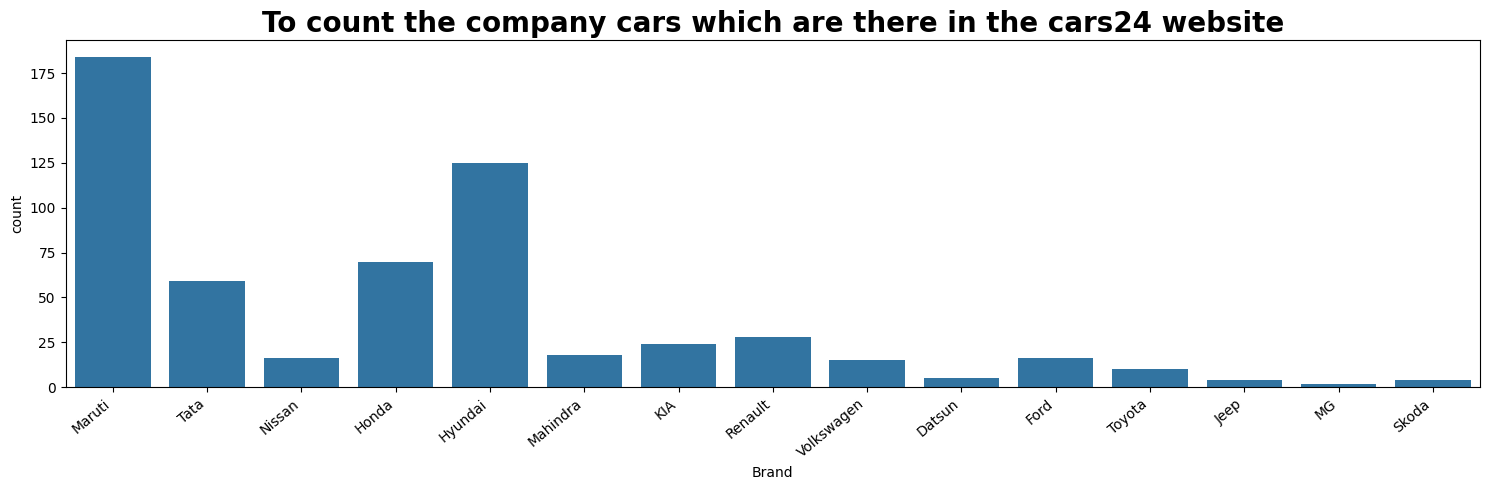

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('cleaned_cars24_delhi-ncr.csv')

fig=plt.figure(figsize=(15,5))

k=sns.countplot(x='Brand',data=df)

y=k.set_xticklabels(k.get_xticklabels(), rotation=40, ha="right")
#ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
y=plt.title("To count the company cars which are there in the cars24 website",fontsize=20,fontweight="bold")
plt.tight_layout()
plt.show(y)